In [ ]:
#Hari Venkataraman
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Loading Dataset
data = pd.read_csv('GraduateAdmissions.csv')

#Find Missing Values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Admission            0
dtype: int64


In [41]:
#Dropping Nan Values
data.dropna(inplace=True)

<Axes: >

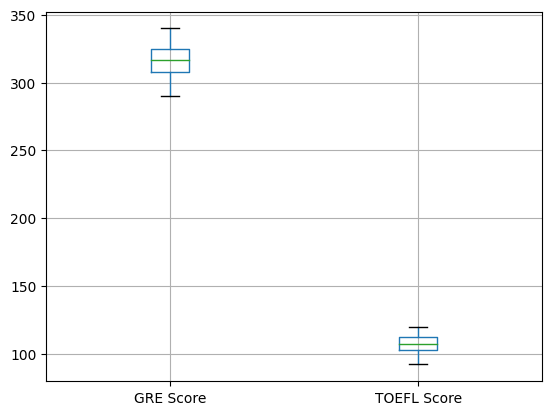

In [42]:
#Plotting to detect Outliers
data.boxplot(column=['GRE Score', 'TOEFL Score'])

In [ ]:
#Finding Duplicates
duplicates = data.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


In [ ]:
#Dropping duplicate rows
data.drop_duplicates(inplace=True)

In [ ]:
#Normalizing Scores
scaler = StandardScaler()
data[['GRE Score', 'TOEFL Score']] = scaler.fit_transform(data[['GRE Score', 'TOEFL Score']])

In [ ]:
data['Admission']

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Admission, Length: 500, dtype: int64

In [ ]:
#Splitting dataset
X = data[['GRE Score', 'TOEFL Score']]
y = data['Admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [40]:
gre_score = float(input("Enter GRE score: "))
toefl_score = float(input("Enter TOEFL score: "))

# tandardize the user input
input_data = scaler.transform([[gre_score, toefl_score]])

#Predict admission
admission_probability = model.predict_proba(input_data)[0][1]
if admission_probability >= 0.5:
    print("The chance of admission is high.")
else:
    print("The chance of admission is low.")

Enter GRE score: 300
Enter TOEFL score: 200
The chance of admission is high.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
